# DNN Classifier

In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps', 'Insulin', 'BMI', 'Pedigree']

In [6]:
# Normalize columns
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: ((x - x.min()) / (x.max() - x.min())) )

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
import tensorflow as tf

In [9]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [10]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [11]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [12]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

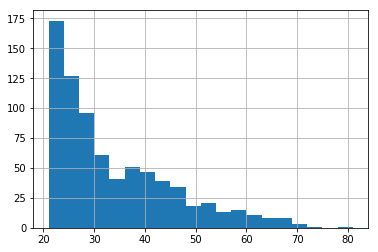

In [14]:
diabetes['Age'].hist(bins=20)

In [15]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [16]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [17]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

In [18]:
x_data = diabetes.drop('Class',axis=1)

In [19]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [20]:
labels = diabetes['Class']

In [21]:
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [23]:
# Input Function

input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [24]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_model_dir': '/var/folders/29/rkphzs2j5bn9_0gmnwshrm0m0000gn/T/tmp7s3wv9pv'}


In [25]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/29/rkphzs2j5bn9_0gmnwshrm0m0000gn/T/tmp7s3wv9pv/model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 262.057
INFO:tensorflow:loss = 5.37099, step = 101 (0.383 sec)
INFO:tensorflow:global_step/sec: 285.461
INFO:tensorflow:loss = 6.34478, step = 201 (0.350 sec)
INFO:tensorflow:global_step/sec: 288.88
INFO:tensorflow:loss = 4.98146, step = 301 (0.346 sec)
INFO:tensorflow:global_step/sec: 296.378
INFO:tensorflow:loss = 4.76799, step = 401 (0.337 sec)
INFO:tensorflow:global_step/sec: 272.168
INFO:tensorflow:loss = 3.90299, step = 501 (0.367 sec)
INFO:tensorflow:global_step/sec: 278.799
INFO:tensorflow:loss = 4.60111, step = 601 (0.359 sec)
INFO:tensorflow:global_step/sec: 282.89
INFO:tensorflow:loss = 4.8675, step = 701 (0.353 sec)
INFO:tensorflow:global_step/sec: 288.388
INFO:tensorflow:loss = 6.83949, step = 801 (0.347 sec)
INFO:tensorflow:global_step/sec

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,num_epochs=1,shuffle=False)

In [27]:
results = model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-20-06:56:11
INFO:tensorflow:Restoring parameters from /var/folders/29/rkphzs2j5bn9_0gmnwshrm0m0000gn/T/tmp7s3wv9pv/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-20-06:56:12
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.801317, auc_precision_recall = 0.639636, average_loss = 0.526907, global_step = 1000, label/mean = 0.350649, loss = 60.8577, prediction/mean = 0.368976


In [28]:
results

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80131686,
 'auc_precision_recall': 0.63963562,
 'average_loss': 0.52690655,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 60.857704,
 'prediction/mean': 0.3689757}

In [29]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [30]:
predictions = model.predict(pred_input_func)

In [31]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /var/folders/29/rkphzs2j5bn9_0gmnwshrm0m0000gn/T/tmp7s3wv9pv/model.ckpt-1000


In [32]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.54851478], dtype=float32),
  'logits': array([ 0.19467175], dtype=float32),
  'probabilities': array([ 0.45148516,  0.54851478], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.61572599], dtype=float32),
  'logits': array([ 0.47144616], dtype=float32),
  'probabilities': array([ 0.38427404,  0.61572599], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.37729463], dtype=float32),
  'logits': array([-0.50104707], dtype=float32),
  'probabilities': array([ 0.6227054 ,  0.37729463], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.35499078], dtype=float32),
  'logits': array([-0.59717292], dtype=float32),
  'probabilities': array([ 0.64500922,  0.35499075], dtype=float32)},
 {'class_ids': array([0]),
  'classes': arra

In [33]:
predictions

<generator object Estimator.predict at 0x118952a40>

In [34]:
# DNN MODEL

dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_model_dir': '/var/folders/29/rkphzs2j5bn9_0gmnwshrm0m0000gn/T/tmphr3nc4w6'}


In [35]:
# Embedded

embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [36]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [37]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [38]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None, '_tf_random_seed': 1, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_save_summary_steps': 100, '_model_dir': '/var/folders/29/rkphzs2j5bn9_0gmnwshrm0m0000gn/T/tmp571oepio'}


In [39]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/29/rkphzs2j5bn9_0gmnwshrm0m0000gn/T/tmp571oepio/model.ckpt.
INFO:tensorflow:loss = 9.90104, step = 1
INFO:tensorflow:global_step/sec: 329.177
INFO:tensorflow:loss = 5.90522, step = 101 (0.305 sec)
INFO:tensorflow:global_step/sec: 337.223
INFO:tensorflow:loss = 5.52487, step = 201 (0.296 sec)
INFO:tensorflow:global_step/sec: 313.145
INFO:tensorflow:loss = 3.77485, step = 301 (0.322 sec)
INFO:tensorflow:global_step/sec: 339.007
INFO:tensorflow:loss = 5.613, step = 401 (0.293 sec)
INFO:tensorflow:global_step/sec: 327.617
INFO:tensorflow:loss = 2.05686, step = 501 (0.305 sec)
INFO:tensorflow:global_step/sec: 347.498
INFO:tensorflow:loss = 6.7623, step = 601 (0.288 sec)
INFO:tensorflow:global_step/sec: 285.491
INFO:tensorflow:loss = 2.93938, step = 701 (0.353 sec)
INFO:tensorflow:global_step/sec: 316.157
INFO:tensorflow:loss = 2.64662, step = 801 (0.313 sec)
INFO:tensorflow:global_step/sec

In [40]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [41]:
dnn_model.evaluate(input_fn=eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-20-06:56:25
INFO:tensorflow:Restoring parameters from /var/folders/29/rkphzs2j5bn9_0gmnwshrm0m0000gn/T/tmp571oepio/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-02-20-06:56:26
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.761905, accuracy_baseline = 0.649351, auc = 0.832222, auc_precision_recall = 0.699261, average_loss = 0.488905, global_step = 1000, label/mean = 0.350649, loss = 4.70571, prediction/mean = 0.394562


{'accuracy': 0.76190478,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83222222,
 'auc_precision_recall': 0.69926149,
 'average_loss': 0.48890528,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.7057133,
 'prediction/mean': 0.39456189}